<a href="https://colab.research.google.com/github/jangbulama/ai-workshop-1/blob/main/worksheet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


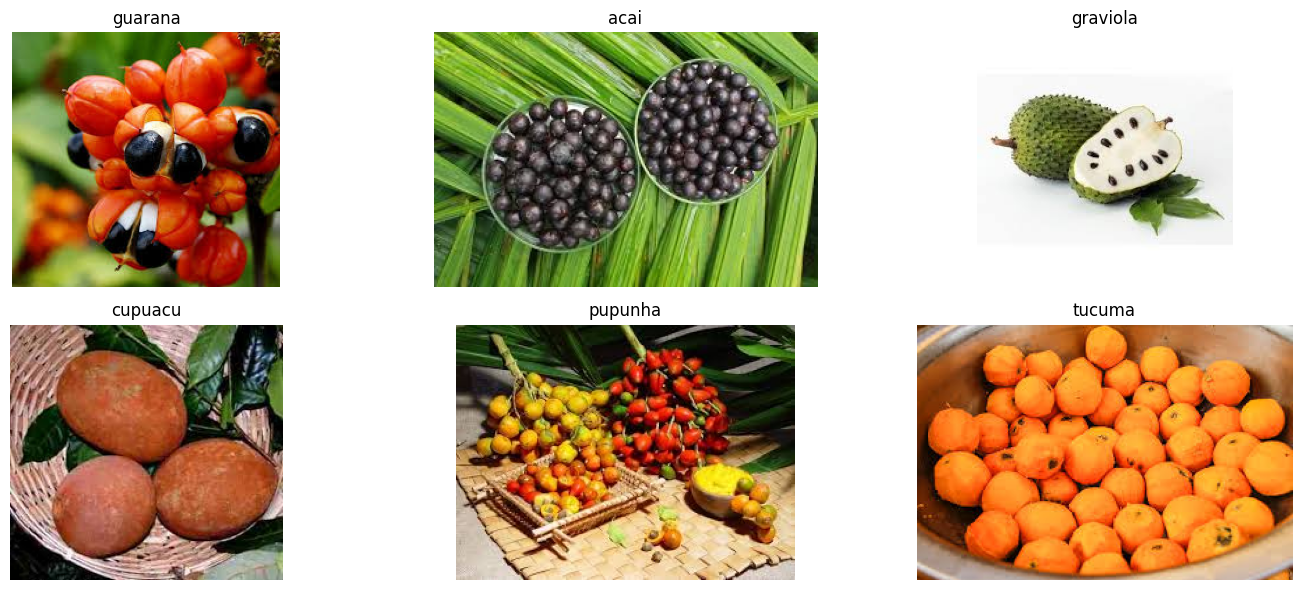

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to training and test folders (update these to your actual dataset path in Drive)
train_dir = '/content/drive/MyDrive/NewSHh/FruitinAmazon/train'
test_dir2 = '/content/drive/MyDrive/NewSHh/FruitinAmazon/test'

# Get the list of class directories
class_names = os.listdir(train_dir)
class_names = [cls for cls in class_names if os.path.isdir(os.path.join(train_dir, cls))]

# Select one random image from each class
selected_images = []
for cls in class_names:
    class_path = os.path.join(train_dir, cls)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    if image_files:  # Ensure the class folder is not empty
        random_image = random.choice(image_files)
        selected_images.append((cls, os.path.join(class_path, random_image)))

# Check if there are any images selected
if selected_images:
    num_images = len(selected_images)

    # Calculate the number of columns required (half of the number of images, rounded up)
    cols = (num_images + 1) // 2

    # Create subplots with 2 rows and the calculated number of columns
    fig, axes = plt.subplots(2, cols, figsize=(15, 6))

    # Flatten the axes array for easier indexing if there are more than one row
    axes = axes.flatten()

    # Display the images
    for idx, (cls, img_path) in enumerate(selected_images):
        img = mpimg.imread(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(cls)
        axes[idx].axis('off')

    # Hide any extra axes if the number of selected images is less than 2 * cols
    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("No images found to display.")


# Task - 1:
Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.


• Use Data Augmentation to increase the number of training image.
• Use deeper model with BN and DropOut layer as presented above.
• Understand the Model Summary and Training Behavior.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Assuming multiple fruit classes
)

validation_generator = test_datagen.flow_from_directory(
    test_dir2,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


Deeper CNN Model with BatchNormalization & Dropout

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - accuracy: 0.2272 - loss: 13.4160 - val_accuracy: 0.1667 - val_loss: 2.7613
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4780 - loss: 14.8561 - val_accuracy: 0.1667 - val_loss: 3.1180
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.4192 - loss: 14.0567 - val_accuracy: 0.1667 - val_loss: 3.3111
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5802 - loss: 11.1434 - val_accuracy: 0.2333 - val_loss: 3.4824
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6549 - loss: 5.8033 - val_accuracy: 0.1667 - val_loss: 6.5877
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5607 - loss: 8.0319 - val_accuracy: 0.2000 - val_loss: 7.3811
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6717 - loss: 5.6921 - val_accuracy: 0.2000 - val_loss: 9.8160
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6005 - loss: 9.8874 - val_accuracy: 0.2333 - val_loss: 11.0725
Epoch 9

Train the Model and Understand Behavior

Outcome

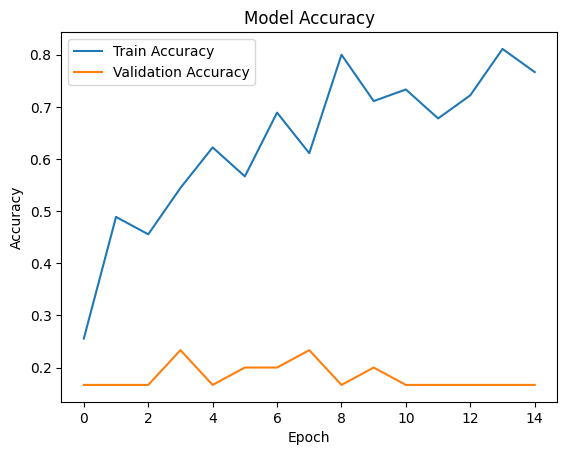

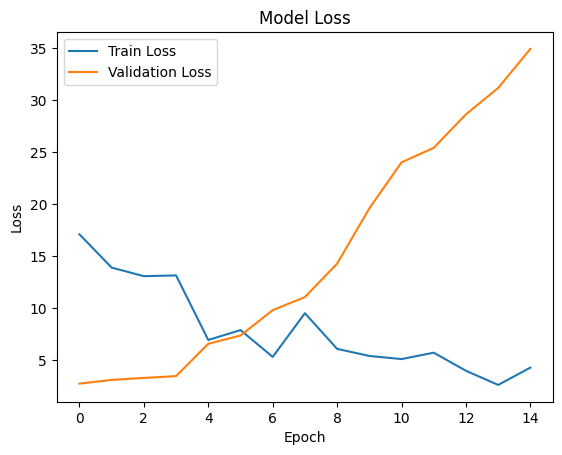

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,112,020 (217.87 MB)

 Trainable params: 19,037,190 (72.62 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 38,074,382 (145.24 MB)

#Task 2
#Load the VGG16 Pre-trained Model

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Freeze the Base Model Layers

In [ ]:
for layer in base_model.layers:
    layer.trainable = False


Classification Layers

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


Compile the Model

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


Prepare Data with Correct Target Size (224x224)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


 Train the Model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 66s 25s/step - accuracy: 0.1161 - loss: 1.8896 - val_accuracy: 0.2667 - val_loss: 1.7833
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 25s/step - accuracy: 0.3869 - loss: 1.5976 - val_accuracy: 0.3333 - val_loss: 1.5983
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 0.4942 - loss: 1.3566 - val_accuracy: 0.4000 - val_loss: 1.5157
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 63s 24s/step - accuracy: 0.6912 - loss: 1.1189 - val_accuracy: 0.4333 - val_loss: 1.4611
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 68s 25s/step - accuracy: 0.7344 - loss: 1.0389 - val_accuracy: 0.4667 - val_loss: 1.4239
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 69s 23s/step - accuracy: 0.7962 - loss: 0.9227 - val_accuracy: 0.6667 - val_loss: 1.3324
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 77s 25s/step - accuracy: 0.8601 - loss: 0.8128 - val_accuracy: 0.6333 - val_loss: 1.3385
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 86s 26s/step - accuracy: 0.8092 - loss: 0.7298 - val_accuracy: 0.5333 - val_loss: 1.3193


Generate Predictions & Classification Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Get predictions
Y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred = np.argmax(Y_pred, axis=1)

# Print classification report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=list(validation_generator.class_indices.keys())))


1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
Classification Report
              precision    recall  f1-score   support

        acai       0.33      0.20      0.25         5
     cupuacu       0.43      0.60      0.50         5
    graviola       0.00      0.00      0.00         5
     guarana       0.40      0.40      0.40         5
     pupunha       0.33      0.40      0.36         5
      tucuma       0.14      0.20      0.17         5

    accuracy                           0.30        30
   macro avg       0.27      0.30      0.28        30
weighted avg       0.27      0.30      0.28        30



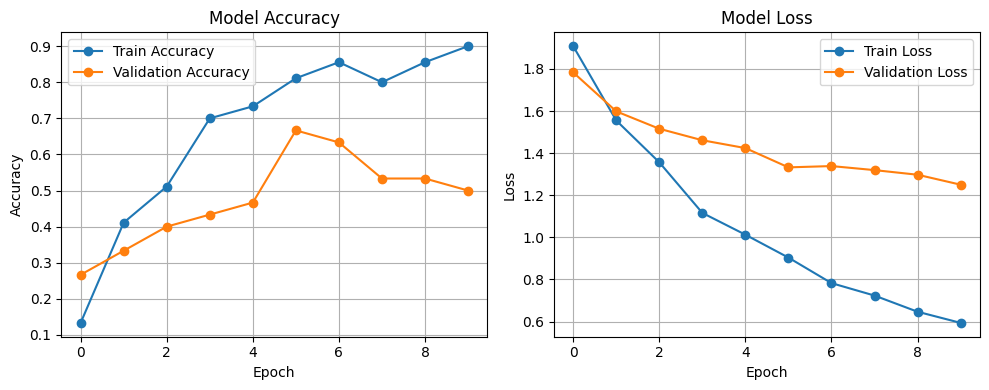

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
